In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
import numpy as np
import tensorflow as tf
import schedules
from matplotlib import pyplot as plt

In [3]:
train_steps = 1251

warmup_epochs = 5
max_epochs = 90

schedule = schedules.DecayWithWarmup(
    epoch_steps=train_steps,
    base_lr=0.4,
    min_lr=0.0004,
    decay_exp=10,
    warmup_epochs=warmup_epochs,
    flat_epochs=30,
    max_epochs=max_epochs,
)

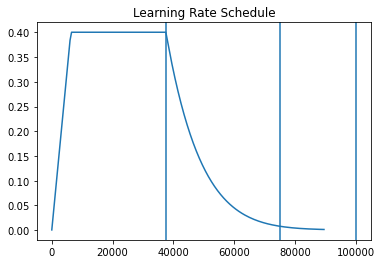

In [4]:
step_list = [step*500 for step in range(90*2)]
lr_list = [schedule(step) for step in step_list]

plt.title("Learning Rate Schedule")
plt.plot(step_list, lr_list)
plt.axvline(30*train_steps)
plt.axvline(60*train_steps)
plt.axvline(80*train_steps)
plt.show()

**Targets**

* 30 : 0.4
* 60 : 0.04
* 80 : 0.004

In [5]:
for i, lr in enumerate(lr_list):
    if int(i/2) in [30, 60, 80]:
        print(i/2, float(lr))

30.0 0.4004000127315521
30.5 0.4004000127315521
60.0 0.044776879251003265
60.5 0.04240742325782776
80.0 0.004152241628617048
80.5 0.0038975069765001535
